# Testing TIC crossmatch 2MASS

Author: Melissa DeLucchi

Help provided: Sandro Campos, Neven Caplar, Konstantin Malanchev, Sean McGuire

As part of validating changes for HiPSCat -> HATS, the migration script, the import process, and LSDB operations. We took a TIC HiPSCat and converted to HATS, and imported 2MASS into HATS from raw data files.

TIC is a composite catalog, and uses 2MASS as an input. We would expect that TIC would provide a superset of objects contained in 2MASS.

In [30]:
import lsdb

In [31]:
# These numbers don't mean much - just what I typed out in the meeting.
cone_filter = lsdb.core.search.ConeSearch(80, 80, 200)

tic = lsdb.read_hats("/data3/epyc/data3/hats/catalogs/tic/tic", 
                     margin_cache="/data3/epyc/data3/hats/catalogs/tic/tic_10arcs",
                     search_filter=cone_filter)

In [32]:
print(tic.hc_structure.catalog_info)

  catalog_name tic
  catalog_type object
  total_rows 0
  ra_column ra
  dec_column dec



In [33]:
print(tic.margin.hc_structure.catalog_info)

  catalog_name tic_10arcs
  catalog_type margin
  total_rows 0
  ra_column ra
  dec_column dec
  primary_catalog /data3/epyc/data3/hipscat/catalogs/tic/tic
  margin_threshold 10.0



In [34]:
tmass = lsdb.read_hats("/data3/epyc/data3/hats/tmp/two_mass",search_filter=cone_filter)
print(tmass.hc_structure.catalog_info)

  catalog_name two_mass
  catalog_type object
  total_rows 0
  ra_column ra
  dec_column decl



In [35]:
tic.hc_structure.schema

_healpix_29: int64
ID: int64
version: string
HIP: int32
TYC: string
UCAC: string
TWOMASS: string
SDSS: int64
ALLWISE: string
GAIA: string
APASS: string
KIC: int32
objType: string
typeSrc: string
ra: double
dec: double
POSflag: string
pmRA: double
e_pmRA: double
pmDEC: double
e_pmDEC: double
PMflag: string
plx: double
e_plx: double
PARflag: string
gallong: double
gallat: double
eclong: double
eclat: double
Bmag: double
e_Bmag: double
Vmag: double
e_Vmag: double
umag: double
e_umag: double
gmag: double
e_gmag: double
rmag: double
e_rmag: double
imag: double
e_imag: double
zmag: double
e_zmag: double
Jmag: double
e_Jmag: double
Hmag: double
e_Hmag: double
Kmag: double
e_Kmag: double
TWOMflag: string
prox: double
w1mag: double
e_w1mag: double
w2mag: double
e_w2mag: double
w3mag: double
e_w3mag: double
w4mag: double
e_w4mag: double
GAIAmag: double
e_GAIAmag: double
Tmag: double
e_Tmag: double
TESSflag: string
SPFlag: string
Teff: double
e_Teff: double
logg: double
e_logg: double
MH: double


In [36]:
xm = tmass.crossmatch(tic, suffixes=("_2mass","_tic" ))
xm

,ra_2mass,decl_2mass,err_maj_2mass,err_min_2mass,err_ang_2mass,designation_2mass,j_m_2mass,j_cmsig_2mass,j_msigcom_2mass,j_snr_2mass,h_m_2mass,h_cmsig_2mass,h_msigcom_2mass,h_snr_2mass,k_m_2mass,k_cmsig_2mass,k_msigcom_2mass,k_snr_2mass,ph_qual_2mass,rd_flg_2mass,bl_flg_2mass,cc_flg_2mass,ndet_2mass,prox_2mass,pxpa_2mass,pxcntr_2mass,gal_contam_2mass,mp_flg_2mass,pts_key_2mass,hemis_2mass,date_2mass,scan_2mass,glon_2mass,glat_2mass,x_scan_2mass,jdate_2mass,j_psfchi_2mass,h_psfchi_2mass,k_psfchi_2mass,j_m_stdap_2mass,j_msig_stdap_2mass,h_m_stdap_2mass,h_msig_stdap_2mass,k_m_stdap_2mass,k_msig_stdap_2mass,dist_edge_ns_2mass,dist_edge_ew_2mass,dist_edge_flg_2mass,dup_src_2mass,use_src_2mass,a_2mass,dist_opt_2mass,phi_opt_2mass,b_m_opt_2mass,vr_m_opt_2mass,nopt_mchs_2mass,ext_key_2mass,scan_key_2mass,coadd_key_2mass,coadd_2mass,Norder_2mass,Dir_2mass,Npix_2mass,ID_tic,version_tic,HIP_tic,TYC_tic,UCAC_tic,TWOMASS_tic,SDSS_tic,ALLWISE_tic,GAIA_tic,APASS_tic,KIC_tic,objType_tic,typeSrc_tic,ra_tic,dec_tic,POSflag_tic,pmRA_tic,e_pmRA_tic,pmDEC_tic,e_pmDEC_tic,PMflag_tic,plx_tic,e_plx_tic,PARflag_tic,gallong_tic,gallat_tic,eclong_tic,eclat_tic,Bmag_tic,e_Bmag_tic,Vmag_tic,e_Vmag_tic,umag_tic,e_umag_tic,gmag_tic,e_gmag_tic,rmag_tic,e_rmag_tic,imag_tic,e_imag_tic,zmag_tic,e_zmag_tic,Jmag_tic,e_Jmag_tic,Hmag_tic,e_Hmag_tic,Kmag_tic,e_Kmag_tic,TWOMflag_tic,prox_tic,w1mag_tic,e_w1mag_tic,w2mag_tic,e_w2mag_tic,w3mag_tic,e_w3mag_tic,w4mag_tic,e_w4mag_tic,GAIAmag_tic,e_GAIAmag_tic,Tmag_tic,e_Tmag_tic,TESSflag_tic,SPFlag_tic,Teff_tic,e_Teff_tic,logg_tic,e_logg_tic,MH_tic,e_MH_tic,rad_tic,e_rad_tic,mass_tic,e_mass_tic,rho_tic,e_rho_tic,lumclass_tic,lum_tic,e_lum_tic,d_tic,e_d_tic,ebv_tic,e_ebv_tic,numcont_tic,contratio_tic,disposition_tic,duplicate_id_tic,priority_tic,eneg_EBV_tic,epos_EBV_tic,EBVflag_tic,eneg_Mass_tic,epos_Mass_tic,eneg_Rad_tic,epos_Rad_tic,eneg_rho_tic,epos_rho_tic,eneg_logg_tic,epos_logg_tic,eneg_lum_tic,epos_lum_tic,eneg_dist_tic,epos_dist_tic,distflag_tic,eneg_Teff_tic,epos_Teff_tic,TeffFlag_tic,gaiabp_tic,e_gaiabp_tic,gaiarp_tic,e_gaiarp_tic,gaiaqflag_tic,starchareFlag_tic,VmagFlag_tic,BmagFlag_tic,splists_tic,e_RA_tic,e_Dec_tic,RA_orig_tic,Dec_orig_tic,e_RA_orig_tic,e_Dec_orig_tic,raddflag_tic,wdflag_tic,objID_tic,Norder_tic,Dir_tic,Npix_tic,_dist_arcsec
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
274719577269600256,double[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],int16[pyarrow],string[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],float[pyarrow],int16[pyarrow],int64[pyarrow],int16[pyarrow],int16[pyarrow],int64[pyarrow],string[pyarrow],string[pyarrow],int16[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],int64[pyarrow],string[pyarrow],int16[pyarrow],int16[pyarrow],string[pyarrow],float[pyarrow],int16[pyarrow],float[pyarrow],float[pyarrow],int16[pyarrow],int64[pyarrow],int64[pyarrow],int64[pyarrow],int16[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow],int64[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int64[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],int32[pyarrow],string[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],string[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double

In [37]:
result = xm.compute()

In [38]:
result[["TWOMASS_tic", "designation_2mass"]]

,TWOMASS_tic,designation_2mass
_healpix_29,,
276880587498555145,05194809+7956523,05194809+7956523
276880634399107075,05195989+7957096,05195989+7957096
276880658414299418,05203019+7958257,05203019+7958257
276880658767041137,05203350+7958335,05203350+7958335
276881000334508958,05193728+7958104,05193728+7958104
276881015979897507,05195950+7958039,05195950+7958039
276881042681439789,05202582+7959129,05202582+7959129
276881045758356950,05195018+7958251,05195018+7958251
276881122179143778,05191438+7959053,05191438+7959053


In [39]:
tic_result = tic.compute()

In [40]:
tmass_result = tmass.compute()

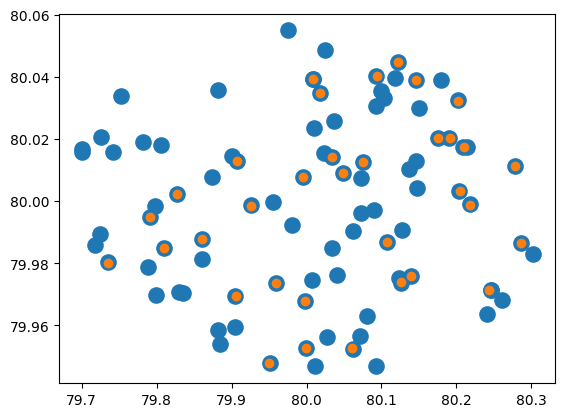

In [41]:
import matplotlib.pyplot as plt

plt.scatter(tic_result["ra"],tic_result["dec"], s=120)
plt.scatter(tmass_result["ra"],tmass_result["decl"])